# **Scenario 1 (Dashboard)**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import fft, fftfreq

In [3]:
# Updated file path with raw string to handle backslashes correctly
file_path = r'C:\Users\Dawwi\Desktop\IOT\data\scenario 1 2024-10-21 19-29-29.xls'

# Reading the Excel file
xls = pd.ExcelFile(file_path)

# Get all sheet names to understand the structure of the file
sheet_names = xls.sheet_names
sheet_names

['Accelerometer', 'Gyroscope', 'Location', 'Metadata Device', 'Metadata Time']

In [4]:
# Reading the 'Accelerometer' sheets into dataframes
df_accelerometer = pd.read_excel(file_path, sheet_name='Accelerometer', header=[0])
df_gyroscope = pd.read_excel(file_path, sheet_name='Gyroscope', header=[0])

In [5]:
# Strip extra spaces from column names for both dataframes
df_accelerometer.columns = df_accelerometer.columns.str.strip()
df_gyroscope.columns = df_gyroscope.columns.str.strip()

In [6]:
# Display the first few rows to check the data
print(df_accelerometer.head())
print(df_gyroscope.head())

   Time (s)         x          y         z
0  0.005335  0.023942   9.722853  0.885855
1  0.025324 -0.397437  10.395624 -0.189142
2  0.045313 -0.220267   9.785102  0.304064
3  0.065332 -0.134075   9.974244  0.433351
4  0.085321 -0.469264  10.156203  0.040701
   Time (s)         x         y         z
0  0.017328  0.060476 -0.017104 -0.012828
1  0.037348 -0.027489 -0.009163 -0.025045
2  0.057337  0.027489 -0.001222  0.007330
3  0.077326  0.004276 -0.004887 -0.017715
4  0.097315 -0.050091  0.028100  0.007330


In [7]:
# Check the column names of both sheets
print("Accelerometer Columns: ", df_accelerometer.columns)
print("Gyroscope Columns: ", df_gyroscope.columns)

Accelerometer Columns:  Index(['Time (s)', 'x', 'y', 'z'], dtype='object')
Gyroscope Columns:  Index(['Time (s)', 'x', 'y', 'z'], dtype='object')


In [8]:
# Now accessing the 'x', 'y', 'z' columns should work
acc_x = df_accelerometer['x'].values
acc_y = df_accelerometer['y'].values
acc_z = df_accelerometer['z'].values

gyr_x = df_gyroscope['x'].values
gyr_y = df_gyroscope['y'].values
gyr_z = df_gyroscope['z'].values

# **No. 1 Plot Accelerometer and gyroscope scenario 1 driver**

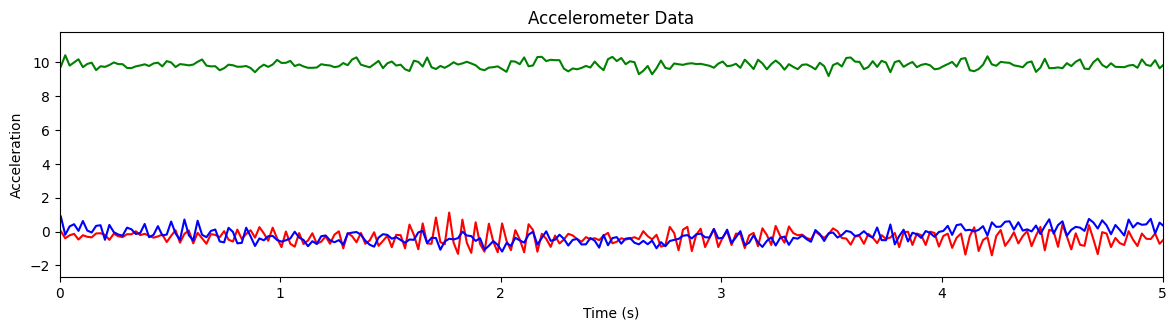

In [9]:
# Plot Accelerometer data (assuming columns for x, y, z axes are available)
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(df_accelerometer['Time (s)'], acc_x, label='X-axis', color='r')
plt.plot(df_accelerometer['Time (s)'], acc_y, label='Y-axis', color='g')
plt.plot(df_accelerometer['Time (s)'], acc_z, label='Z-axis', color='b')
plt.title('Accelerometer Data')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration')
plt.xlim([0, 5])  # Limit x-axis to 5 seconds

# Show the plots
plt.tight_layout()
plt.show()


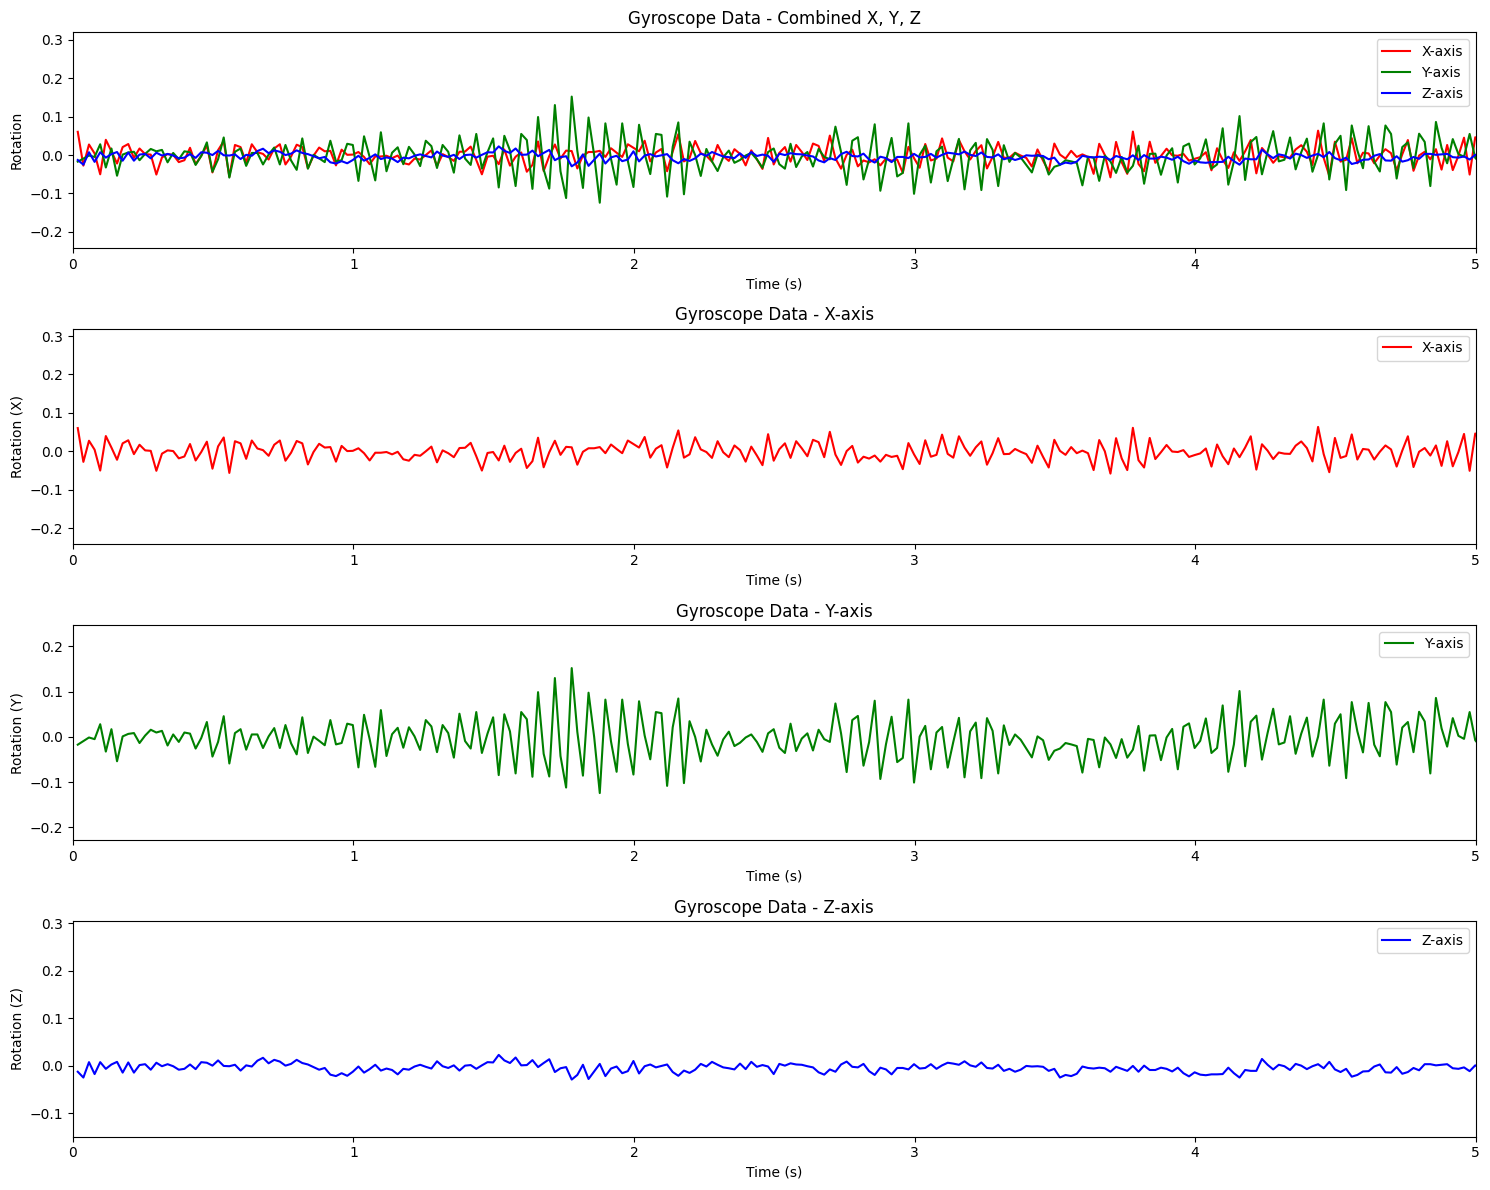

In [10]:
# Create a figure with a total of 4 rows to accommodate all the subplots
plt.figure(figsize=(15, 12))

# Combined plot for all axes (X, Y, Z) - Positioned in the 1st row (full width)
plt.subplot(4, 1, 1)
plt.plot(df_gyroscope['Time (s)'], gyr_x, label='X-axis', color='r')
plt.plot(df_gyroscope['Time (s)'], gyr_y, label='Y-axis', color='g')
plt.plot(df_gyroscope['Time (s)'], gyr_z, label='Z-axis', color='b')
plt.title('Gyroscope Data - Combined X, Y, Z')
plt.xlabel('Time (s)')
plt.ylabel('Rotation')
plt.xlim([0, 5])  # Limit x-axis to 5 seconds
plt.legend()

# Plot for X-axis - Positioned in the 2nd row
plt.subplot(4, 1, 2)
plt.plot(df_gyroscope['Time (s)'], gyr_x, label='X-axis', color='r')
plt.title('Gyroscope Data - X-axis')
plt.xlabel('Time (s)')
plt.ylabel('Rotation (X)')
plt.xlim([0, 5])  # Limit x-axis to 5 seconds
plt.legend()

# Plot for Y-axis - Positioned in the 3rd row
plt.subplot(4, 1, 3)
plt.plot(df_gyroscope['Time (s)'], gyr_y, label='Y-axis', color='g')
plt.title('Gyroscope Data - Y-axis')
plt.xlabel('Time (s)')
plt.ylabel('Rotation (Y)')
plt.xlim([0, 5])  # Limit x-axis to 5 seconds
plt.legend()

# Plot for Z-axis - Positioned in the 4th row
plt.subplot(4, 1, 4)
plt.plot(df_gyroscope['Time (s)'], gyr_z, label='Z-axis', color='b')
plt.title('Gyroscope Data - Z-axis')
plt.xlabel('Time (s)')
plt.ylabel('Rotation (Z)')
plt.xlim([0, 5])  # Limit x-axis to 5 seconds
plt.legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


# **No. 2 Plot Spectrum Accelerometer and Spectrum Gyroscope**

In [11]:
# Define the FFT function
def compute_fft(signal, sampling_rate=50):
    N = len(signal)
    yf = fft(signal)
    xf = fftfreq(N, 1/sampling_rate)
    return xf, np.abs(yf)

In [12]:
#FFT for every axis
acc_x_freq, acc_x_spectrum = compute_fft(acc_x)
acc_y_freq, acc_y_spectrum = compute_fft(acc_y)
acc_z_freq, acc_z_spectrum = compute_fft(acc_z)

gyr_x_freq, gyr_x_spectrum = compute_fft(gyr_x)
gyr_y_freq, gyr_y_spectrum = compute_fft(gyr_y)
gyr_z_freq, gyr_z_spectrum = compute_fft(gyr_z)

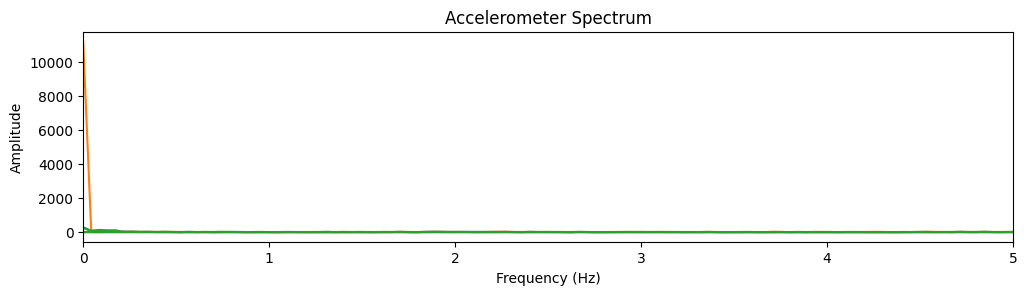

In [13]:
#subplot 1: accelerometer spectrum
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(acc_x_freq, acc_x_spectrum, label='acc_x')
plt.plot(acc_y_freq, acc_y_spectrum, label='acc_y')
plt.plot(acc_z_freq, acc_z_spectrum, label='acc_z')
plt.title('Accelerometer Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.xlim([0, 5])  # Limit x-axis to 5 seconds
plt.show()

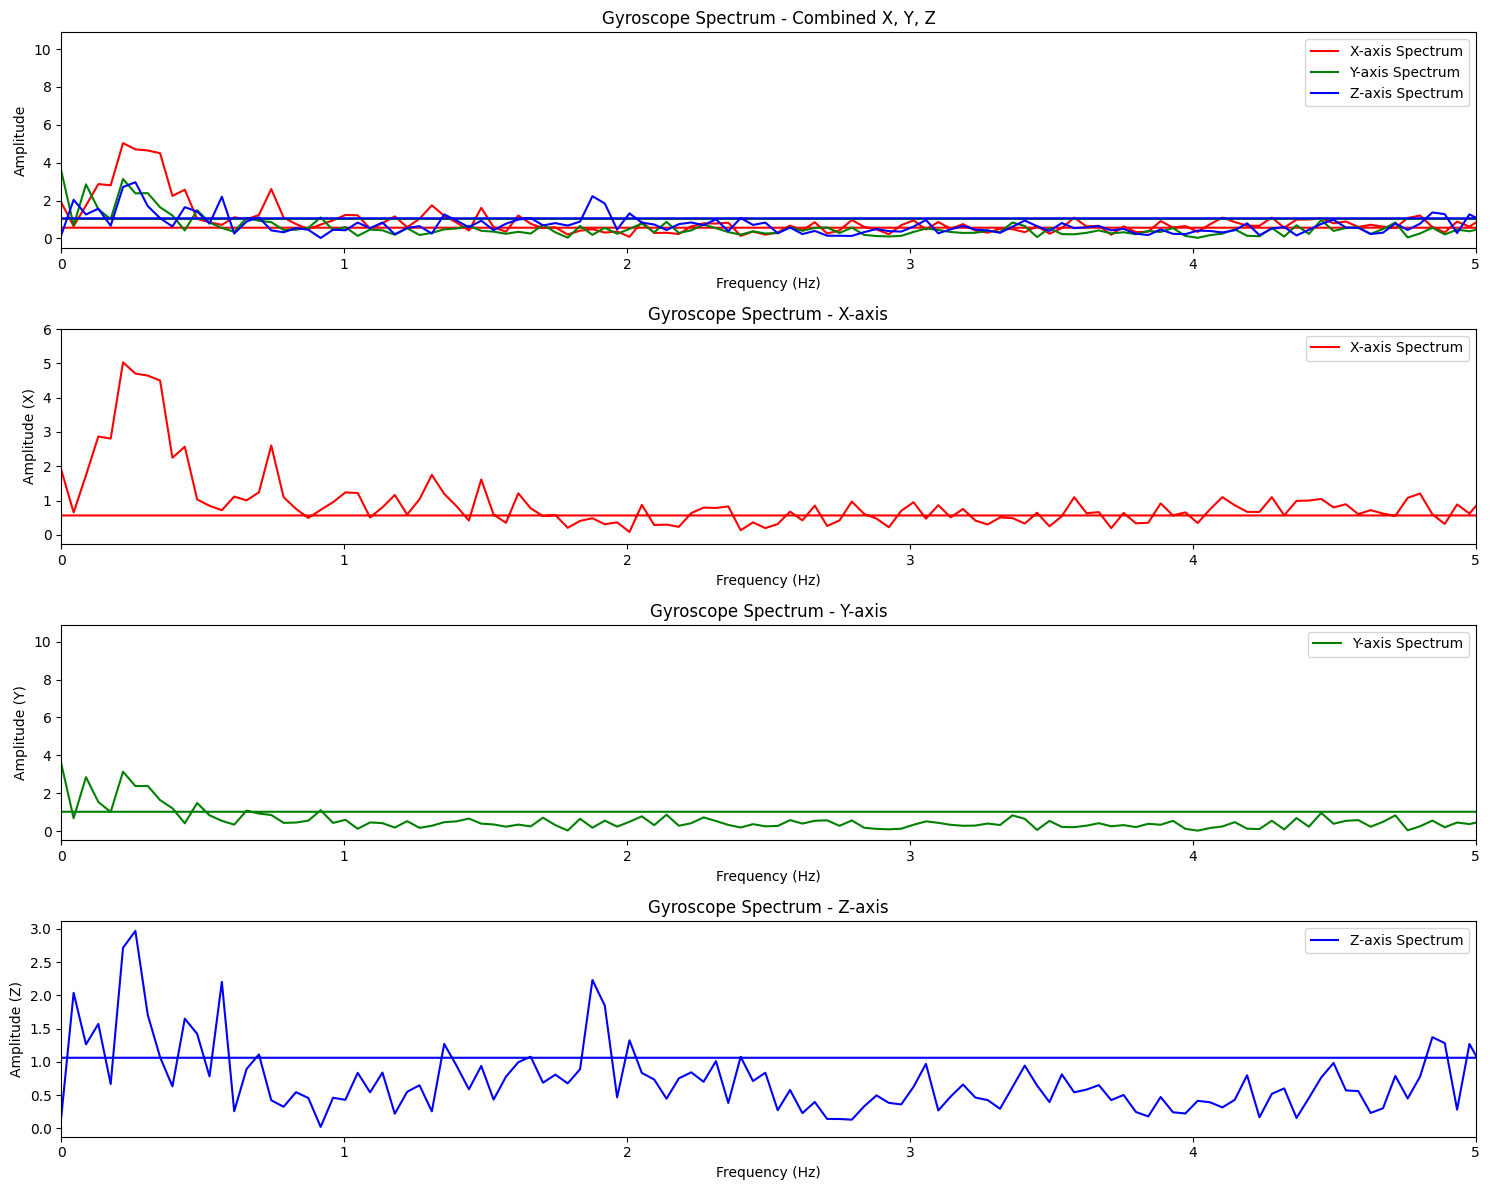

In [14]:
# Create a figure with a total of 4 rows to accommodate all the spectrum subplots
plt.figure(figsize=(15, 12))

# Combined spectrum plot for all axes (X, Y, Z) - Positioned in the 1st row (full width)
plt.subplot(4, 1, 1)
plt.plot(gyr_x_freq, gyr_x_spectrum, label='X-axis Spectrum', color='r')
plt.plot(gyr_y_freq, gyr_y_spectrum, label='Y-axis Spectrum', color='g')
plt.plot(gyr_z_freq, gyr_z_spectrum, label='Z-axis Spectrum', color='b')
plt.title('Gyroscope Spectrum - Combined X, Y, Z')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.xlim([0, 5])
plt.legend()

# Spectrum for X-axis - Positioned in the 2nd row
plt.subplot(4, 1, 2)
plt.plot(gyr_x_freq, gyr_x_spectrum, label='X-axis Spectrum', color='r')
plt.title('Gyroscope Spectrum - X-axis')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (X)')
plt.xlim([0, 5])
plt.legend()

# Spectrum for Y-axis - Positioned in the 3rd row
plt.subplot(4, 1, 3)
plt.plot(gyr_y_freq, gyr_y_spectrum, label='Y-axis Spectrum', color='g')
plt.title('Gyroscope Spectrum - Y-axis')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (Y)')
plt.xlim([0, 5])
plt.legend()

# Spectrum for Z-axis - Positioned in the 4th row
plt.subplot(4, 1, 4)
plt.plot(gyr_z_freq, gyr_z_spectrum, label='Z-axis Spectrum', color='b')
plt.title('Gyroscope Spectrum - Z-axis')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (Z)')
plt.xlim([0, 5])
plt.legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


# **Dominant Frequency**

In [15]:
# Find dominant frequency for Accelerometer
acc_x_dominant_freq = acc_x_freq[np.argmax(acc_x_spectrum)]
acc_y_dominant_freq = acc_y_freq[np.argmax(acc_y_spectrum)]
acc_z_dominant_freq = acc_z_freq[np.argmax(acc_z_spectrum)]

print(f"Dominant Frequency for Accelerometer X: {acc_x_dominant_freq} Hz")
print(f"Dominant Frequency for Accelerometer Y: {acc_y_dominant_freq} Hz")
print(f"Dominant Frequency for Accelerometer Z: {acc_z_dominant_freq} Hz")

# Find dominant frequency for Gyroscope
gyr_x_dominant_freq = gyr_x_freq[np.argmax(gyr_x_spectrum)]
gyr_y_dominant_freq = gyr_y_freq[np.argmax(gyr_y_spectrum)]
gyr_z_dominant_freq = gyr_z_freq[np.argmax(gyr_z_spectrum)]

print(f"Dominant Frequency for Gyroscope X: {gyr_x_dominant_freq} Hz")
print(f"Dominant Frequency for Gyroscope Y: {gyr_y_dominant_freq} Hz")
print(f"Dominant Frequency for Gyroscope Z: {gyr_z_dominant_freq} Hz")

Dominant Frequency for Accelerometer X: 0.0 Hz
Dominant Frequency for Accelerometer Y: 0.0 Hz
Dominant Frequency for Accelerometer Z: 0.0 Hz
Dominant Frequency for Gyroscope X: 18.078602620087334 Hz
Dominant Frequency for Gyroscope Y: 16.55021834061135 Hz
Dominant Frequency for Gyroscope Z: 0.26200873362445415 Hz
